# importimg modules

In [266]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [268]:
data_test=pd.read_csv("test.csv")
'''even the test set has to imupted and scaled and preprocessed'''
data_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [269]:
data_train=pd.read_csv("train.csv")
data_train.head(1)
# Here The Fare in pounds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


# now let's visualise the data  

'In age column missing is less and more in Embarked '

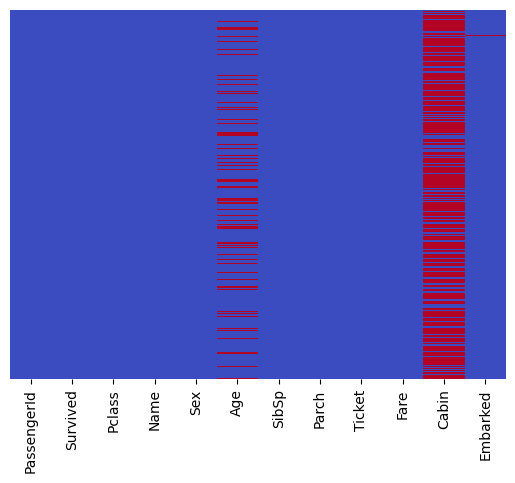

In [271]:
sns.heatmap(data_train.isna(),yticklabels=False,cmap="coolwarm",cbar=False)
#MISSING DATA VISULISATION
'''In age column missing is less and more in Embarked '''

In [272]:
data_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

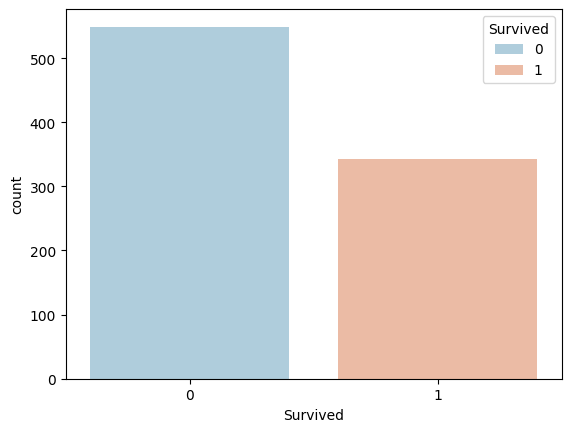

In [273]:
'''survived '''
sns.countplot(x="Survived",hue="Survived",data=data_train,palette='RdBu_r')

In [274]:
# HOW MANY SURVIVED BASED ON SEX

In [275]:
female_count=data_train[data_train["Sex"]=="female"].shape[0]
female_sur=data_train[(data_train["Survived"]==1)&(data_train["Sex"]=="female")].shape[0]
#survived_by_sex = df[df['survived'] == 1]['sex'].value_counts()
male_count=data_train[data_train["Sex"]=="male"].shape[0]
male_sur=data_train[(data_train["Survived"]==1)&(data_train["Sex"]=="male")].shape[0]
print(f"the total female passangers are {female_count}, survived are {female_sur}")
print(f"the total male passangers are {male_count}, survived are {male_sur}")
saved =data_train.groupby('Sex')['Survived'].mean()*100
# does this mean average 74% of female passsengers survived 
print(f"The percentage of survived acoording to {saved}")

the total female passangers are 314, survived are 233
the total male passangers are 577, survived are 109
The percentage of survived acoording to Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


<Axes: xlabel='Survived', ylabel='count'>

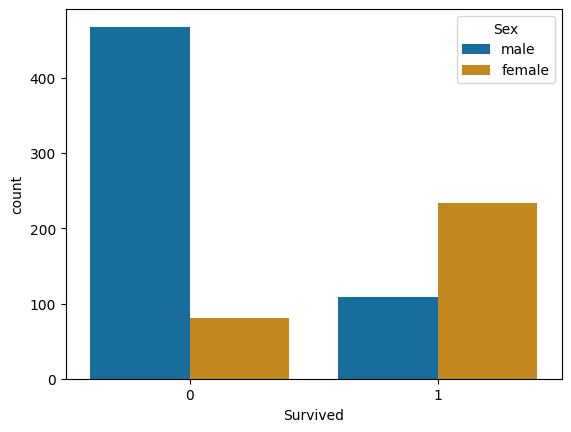

In [276]:
sns.countplot(x="Survived",hue="Sex",data=data_train,palette="colorblind")

In [277]:
# RELATION BETWEEN Pclass AND SUVIVE 

<Axes: xlabel='Survived', ylabel='count'>

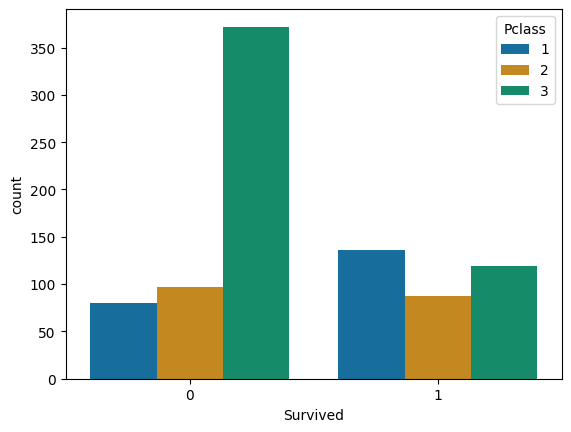

In [278]:
sns.countplot(x="Survived",hue="Pclass",data=data_train,palette="colorblind")

<Axes: >

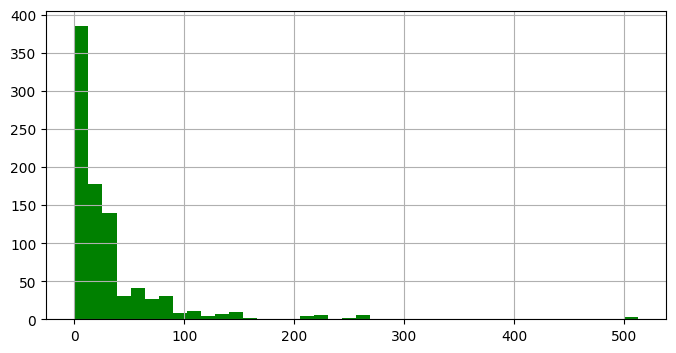

In [279]:
data_train['Fare'].hist(color='green',bins=40,figsize=(8,4))

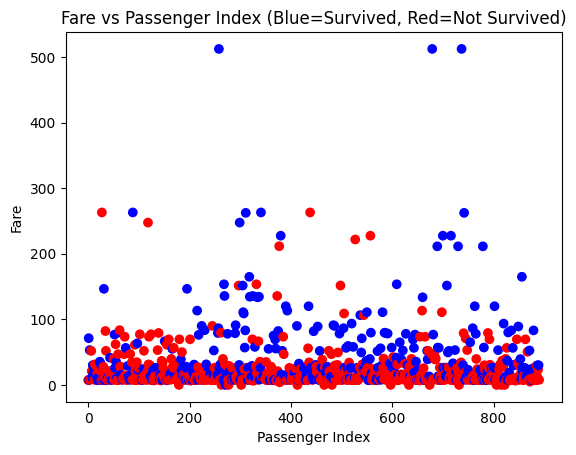

In [280]:
# NOW LETS VISUALUSE SURRVIVED ACCORDING TO FARE 

color=data_train["Survived"].map({1:"blue",0:"red"})
plt.scatter(data_train.index,data_train["Fare"],c=color)
plt.xlabel('Passenger Index')
plt.ylabel('Fare')
plt.title('Fare vs Passenger Index (Blue=Survived, Red=Not Survived)')
plt.show()


In [281]:
#data.groupby('Age')['Survived']

<Axes: >

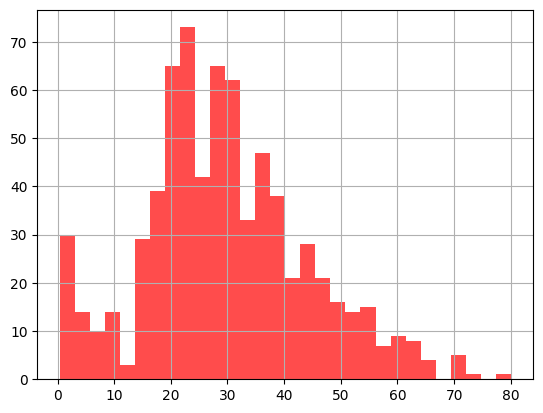

In [282]:
data_train['Age'].hist(color='red',bins=30,alpha=0.7)

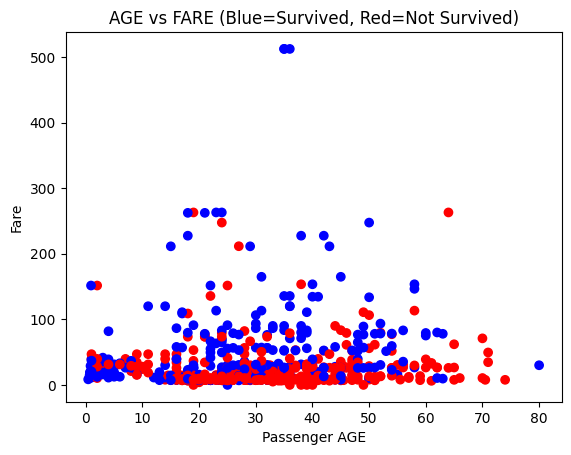

In [283]:
# AGE AND FARE 
color=data_train["Survived"].map({1:"blue",0:"red"})
plt.scatter(data_train["Age"],data_train["Fare"],c=color)
plt.xlabel('Passenger AGE')
plt.ylabel('Fare')
plt.title('AGE vs FARE (Blue=Survived, Red=Not Survived)')
plt.show()

<Axes: xlabel='SibSp', ylabel='count'>

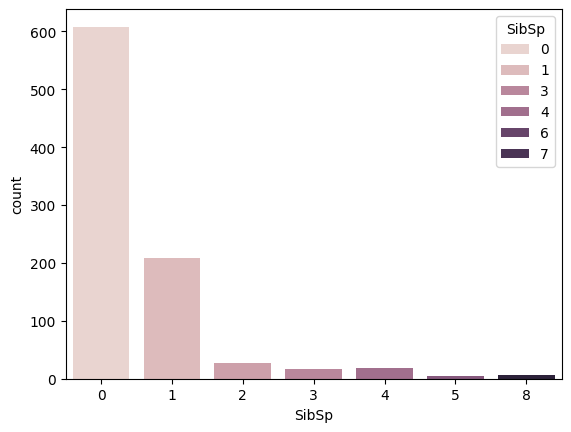

In [284]:
sns.countplot(x="SibSp",hue="SibSp",data=data_train)

<Axes: xlabel='Parch', ylabel='count'>

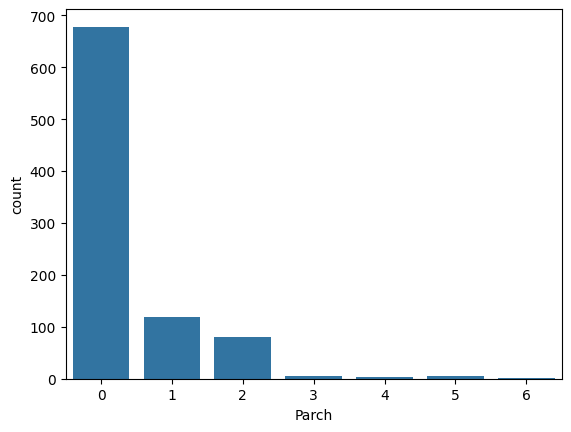

In [285]:
sns.countplot(x="Parch",data=data_train)


In [286]:
# NOW LETS LOOK AT FEATURES 

# IMPUTATION (Filling Missing Values) (Training Set)

In [287]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [288]:
data_train.drop("Cabin",axis=1,inplace=True)
data_test.drop("Cabin",axis=1,inplace=True)


In [289]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [291]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [292]:
# Filling age {{as we will see relation with fare  }}

'From The Plot a median age in 1 st class is 37 & 2nd calsas is 30 and 3rd class 25'

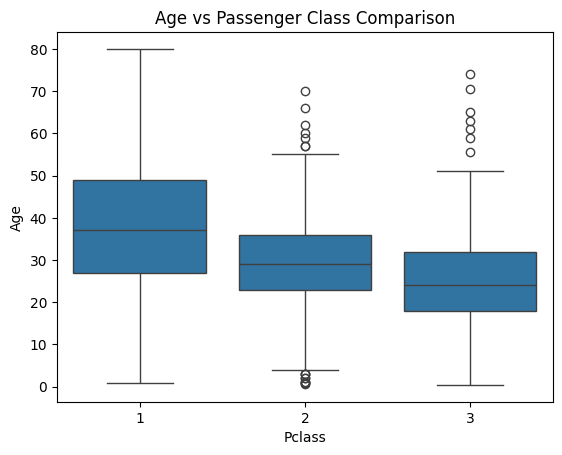

In [293]:
sns.boxplot(data=data_train,x="Pclass",y="Age")
plt.title("Age vs Passenger Class Comparison")

'''From The Plot a median age in 1 st class is 37 & 2nd calsas is 30 and 3rd class 25'''

In [294]:
'''Using Above Data To Impute Age Column'''
def impute_age(col):
    age=col["Age"]
    pclass=col["Pclass"]

    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 30
        else:
            return 25

    else:
        return age
        

In [295]:
data_train["Age"]=data_train[["Age","Pclass"]].apply(impute_age,axis=1)
data_test["Age"]=data_test[["Age","Pclass"]].apply(impute_age,axis=1)
# Filling Missing Embarked Age 
data_train["Embarked"]=data_train["Embarked"].fillna("S")

In [296]:
data_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [297]:
'''So Imputation Is Done'''

'So Imputation Is Done'

# Converting And changing Object Type to Int  Data Type 

In [299]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [300]:
data_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [301]:
#IMPUTING TRAIN SET
sex=pd.get_dummies(data_train["Sex"],drop_first=True,dtype=int)
embarked=pd.get_dummies(data_train["Embarked"],drop_first=True,dtype=int)
pclass=pd.get_dummies(data_train["Pclass"],drop_first=True,dtype=int)

data_train.drop(["Name","Sex","Embarked","Ticket","Pclass"],axis=1,inplace=True)

data_train=pd.concat([data_train,sex,embarked,pclass],axis=1)

data_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [302]:
# Imputing Test set 
sex=pd.get_dummies(data_test["Sex"],drop_first=True,dtype=int)
embarked=pd.get_dummies(data_test["Embarked"],drop_first=True,dtype=int)
pclass=pd.get_dummies(data_test["Pclass"],drop_first=True,dtype=int)


data_test.drop(["Name","Sex","Embarked","Ticket","Pclass"],axis=1,inplace=True)

data_test=pd.concat([data_test,sex,embarked,pclass],axis=1)
PassengerId=pd.DataFrame(data_test["PassengerId"])
data_test.drop("PassengerId",axis=1,inplace=True)
data_test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [303]:
train_y=data_train["Survived"]
train_x=data_train.drop("Survived",axis=1)
train_x.drop("PassengerId",axis=1,inplace=True)
train_x.head()


,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [304]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
 1   SibSp   891 non-null    int64  
 2   Parch   891 non-null    int64  
 3   Fare    891 non-null    float64
 4   male    891 non-null    int64  
 5   Q       891 non-null    int64  
 6   S       891 non-null    int64  
 7   2       891 non-null    int64  
 8   3       891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


# Next Lets Use standard scaler Scaling The Data

In [306]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'SibSp', 'Parch', 'Fare']   # numeric columns to scale
cat_cols = [c for c in train_x.columns if c not in num_cols]       # keep these as 0/1

# Scale only numeric columns
scaler = StandardScaler()
df_scaled_num = pd.DataFrame(
    scaler.fit_transform(train_x[num_cols]),
    columns=num_cols,
    index=train_x.index
)

# Combine scaled numeric + untouched categorical
train_x_final = pd.concat([df_scaled_num, train_x[cat_cols]], axis=1)
train_x_final.columns=train_x_final.columns.astype(str)
train_x_final.head()


,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,-0.548510,0.432793,-0.473674,-0.502445,1,0,1,0,1
1,0.665109,0.432793,-0.473674,0.786845,0,0,0,0,0
2,-0.245105,-0.474545,-0.473674,-0.488854,0,0,1,0,1
3,0.437556,0.432793,-0.473674,0.420730,0,0,1,0,0
4,0.437556,-0.474545,-0.473674,-0.486337,1,0,1,0,1


In [307]:
# Standard scaling test set 
  # numeric columns to scale
cat_cols = [c for c in data_test.columns if c not in num_cols]       # keep these as 0/1

# Scale only numeric columns
scaler = StandardScaler()
test_scaled=pd.DataFrame(
    scaler.fit_transform(data_test[num_cols]),
    columns=num_cols,
    index=data_test.index
)

# Combine scaled numeric + untouched categorical
test_x_final = pd.concat([test_scaled, data_test[cat_cols]], axis=1)
"""keep the test sert aside and work on train set """
test_x_final.columns=test_x_final.columns.astype(str)



# SELECTING AND TRAINING MODEL

In [309]:
# LOGISTIC REGRESSOR


In [310]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_x_final,train_y,test_size=0.1,random_state=42)


#  # LETS TRAIN OUR FIRST MODEL 1ST LogisticRegression

In [312]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(max_iter=500)
logmodel.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [313]:
prediction=logmodel.predict(x_test)
prediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

In [314]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,prediction)

array([[47,  7],
       [ 6, 30]])

In [315]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        54
           1       0.81      0.83      0.82        36

    accuracy                           0.86        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90



# 2nd MODEL DecisionTreeClassifier

In [317]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [318]:
tree_prediction=tree_model.predict(x_test)
tree_prediction

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

In [319]:
confusion_matrix(y_test,tree_prediction)

array([[43, 11],
       [ 8, 28]])

In [320]:
print(classification_report(y_test,tree_prediction))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        54
           1       0.72      0.78      0.75        36

    accuracy                           0.79        90
   macro avg       0.78      0.79      0.78        90
weighted avg       0.79      0.79      0.79        90



# 3rd RandomForestClassifier


In [322]:
from sklearn.ensemble import RandomForestClassifier
For_model=RandomForestClassifier()
For_model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [323]:
For_prediction=For_model.predict(x_test)
For_prediction

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0])

In [324]:
confusion_matrix(y_test,For_prediction)

array([[44, 10],
       [ 6, 30]])

In [325]:
print(classification_report(y_test,For_prediction))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        54
           1       0.75      0.83      0.79        36

    accuracy                           0.82        90
   macro avg       0.81      0.82      0.82        90
weighted avg       0.83      0.82      0.82        90



# 4TH 

In [327]:
import keras
from keras.layers import Dense,Input
from keras.models import Sequential

In [328]:
ann=Sequential()
ann.add(Input(shape=(9,)))
ann.add(Dense(units=32,kernel_initializer='uniform', activation='relu'))
ann.add(Dense(units=32,kernel_initializer='uniform', activation='relu'))
ann.add(Dense(units= 1,kernel_initializer= 'uniform', activation = 'sigmoid'))

In [329]:
ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [330]:
ann.fit(x_train,y_train, batch_size=32,epochs=300,verbose= 0)

In [331]:
ann_pred = ann.predict(x_test)
ann_pred = [ 1 if y>=0.5 else 0 for y in ann_pred]
print(ann_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0]


print(confusion_matrix(y_test,ann_pred))

In [333]:
print(classification_report(y_test,ann_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        54
           1       0.82      0.86      0.84        36

    accuracy                           0.87        90
   macro avg       0.86      0.87      0.86        90
weighted avg       0.87      0.87      0.87        90



# Predicting TEST SET

In [335]:
test_x_final.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0.389462,-0.499470,-0.400248,-0.497811,1,1,0,0,1
1,1.364284,0.616992,-0.400248,-0.512660,0,0,1,0,1
2,2.534069,-0.499470,-0.400248,-0.464532,1,1,0,1,0
3,-0.195431,-0.499470,-0.400248,-0.482888,1,0,1,0,1
4,-0.585359,0.616992,0.619896,-0.417971,0,0,1,0,1


In [336]:
test_prediction=ann.predict(test_x_final)
test_prediction=[ 1 if y>=0.5 else 0 for y in test_prediction]


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [337]:
test_pred = pd.DataFrame(test_prediction, columns= ['Survived'])
new_test = pd.concat([test_x_final, test_pred,PassengerId], axis=1, join='inner')
new_test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3,Survived,PassengerId
0,0.389462,-0.499470,-0.400248,-0.497811,1,1,0,0,1,0,892
1,1.364284,0.616992,-0.400248,-0.512660,0,0,1,0,1,0,893
2,2.534069,-0.499470,-0.400248,-0.464532,1,1,0,1,0,0,894
3,-0.195431,-0.499470,-0.400248,-0.482888,1,0,1,0,1,0,895
4,-0.585359,0.616992,0.619896,-0.417971,0,0,1,0,1,0,896


In [338]:
df=new_test[["PassengerId","Survived"]]

In [339]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [340]:
df["Survived"].value_counts()

Survived
0    265
1    153
Name: count, dtype: int64

In [341]:
df.to_csv("Prediction.csv",index=False)